In [1]:

# imports
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
import scipy 
from skimage.segmentation import flood, flood_fill
from skimage.morphology import binary_dilation, binary_erosion
import cv2 as cv2
%matplotlib inline


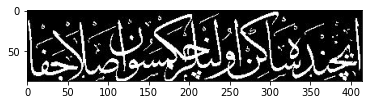

In [2]:
gray = cv2.imread("./ACDB/ACdata_base/5/938.jpg", cv2.IMREAD_GRAYSCALE)

# if len(img.shape)!=2 : gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
h, w = gray.shape
plt.imshow(gray, cmap="gray")


87 414
6692 29326


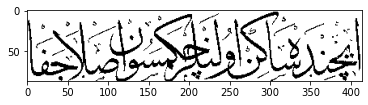

In [3]:
_, bw = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)
_, bw2 = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
hb, wb = bw.shape
print(hb, wb)
countB = 0
countW = 0

for i in range(bw.shape[0]):
    for j in range(bw.shape[1]):
        px1 = bw.item(i, j)
        px2 = bw2.item(i, j)
        if px1 > px2:
            countB += 1
        if px1 < px2:
            countW += 1

print(countB, countW)
if countW > countB:
    bw = bw2
plt.imshow(bw, cmap="gray")
plt.show()


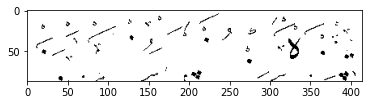

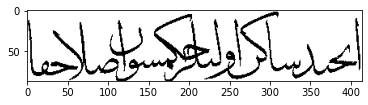

In [4]:

# make line to connect most large histograms
horizontal_hist = np.sum(bw, axis=1)
img_with_Diacritics = np.copy(bw)
img_with_Diacritics = img_with_Diacritics.astype(np.uint8)

basline = np.argmin(horizontal_hist)
seed = []
temp = img_with_Diacritics[basline, 0]
cp = cv2.cvtColor(img_with_Diacritics, cv2.COLOR_GRAY2BGR)
for i in range(1,len(img_with_Diacritics[basline])):
    if temp == 255 and img_with_Diacritics[basline, i] == 0:
        seed.append((i, basline))
        cv2.circle(cp, (i, basline), 2, (255, 0, 0), -1)
    temp = img_with_Diacritics[basline, i]
for i in seed:
    cv2.floodFill(img_with_Diacritics, None, i, 255)
    
plt.imshow(img_with_Diacritics, cmap='gray')
plt.show()
img_without_Diacritics = (bw-img_with_Diacritics)*-1
plt.imshow(img_without_Diacritics, cmap='gray')
plt.show()



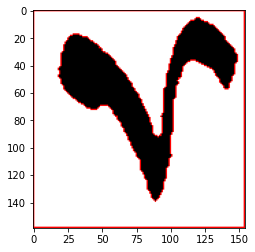

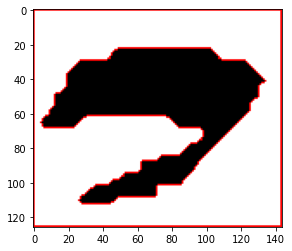

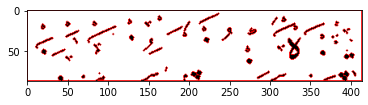

In [5]:
Template1 = imread("./1.png", as_gray=True)
Template2 = imread("./2.png", as_gray=True)
_, BW1 = cv2.threshold(Template1, 0, 255, cv2.THRESH_BINARY)
_, BW2 = cv2.threshold(Template2, 0, 255, cv2.THRESH_BINARY)
BW1 = BW1.astype(np.uint8)
BW2 = BW2.astype(np.uint8)

contours1, hierarchy = cv2.findContours(
    BW1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours2, hierarchy = cv2.findContours(
    BW2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

Temp1Copy = cv2.cvtColor(BW1, cv2.COLOR_GRAY2BGR)
Temp2Copy = cv2.cvtColor(BW2, cv2.COLOR_GRAY2BGR)

cv2.drawContours(Temp1Copy, contours1, -1, (255, 0, 0), 1)
plt.imshow(Temp1Copy)
plt.show()
cv2.drawContours(Temp2Copy, contours2, -1, (255, 0, 0), 1)
plt.imshow(Temp2Copy)
plt.show()


SC1 = sorted(contours1, key=cv2.contourArea, reverse=True)
SC2 = sorted(contours2, key=cv2.contourArea, reverse=True)

temp1 = SC1[1]
temp2 = SC2[1]


hight1, width1 = Template1.shape
hight2, width2 = Template2.shape

img_with_Diacritics = img_with_Diacritics.astype(np.uint8)
contours3, hierarchy = cv2.findContours(img_with_Diacritics, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

img_with_DiacriticsCopy = cv2.cvtColor(img_with_Diacritics, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_with_DiacriticsCopy, contours3, -1, (255, 0, 0), 1)
plt.imshow(img_with_DiacriticsCopy)
plt.show()

i = 1
j= 1
for c in contours3:
    
    # c = cv2.resize(c, (width1, hight1), interpolation=cv2.INTER_AREA)
    match1 = cv2.matchShapes(temp1, c, 3, 0.0)
    # c = cv2.resize(c, (width2, hight2), interpolation=cv2.INTER_AREA)
    match2 = cv2.matchShapes(temp2, c, 3, 0.0)
    if match1 < 0.15:
        print(i, ": match1: ", match1)
        i += 1
    if match2 < 0.15:
        print(j, ": match2: ", match2)
        j += 1

# scipy.spatial.distance.directed_hausdorff(
#     match1, img_with_DiacriticsCopy, seed=0)


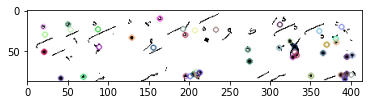

In [7]:
sift = cv2.SIFT_create()
kp = sift.detect(img_with_Diacritics, None)
img = cv2.drawKeypoints(img_with_Diacritics, kp, img_with_Diacritics)
plt.imshow(img)
plt.show()
